<h1> <strong> Tarefa 2: Estudando histogramas e transformações em imagens </strong> </h1>
<p> Antonio Pilan. NUSP: 10562611 </p>

<h3>Ferramentas: OpenCV, Matplotlib e Numpy</h3>

<p>
Inicialmente, vamos inserir um histograma no ambiente Python. Vamos usar a mesma imagem usada na tarefa passada e analisar o histograma dela:
</p>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<p>
Vamos ver a imagem e seu histograma usando o pacote do Matplotlib.

Ao criar o histograma com as coordenadas <strong>ax2</strong> defino já <i style="color: skyblue">density=True</i> que já faz o papel da normalização do histograma, assim, estamos olhando para distribuição de probabilidades da intensidade de cinza dos pixeis da fotografia 
</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

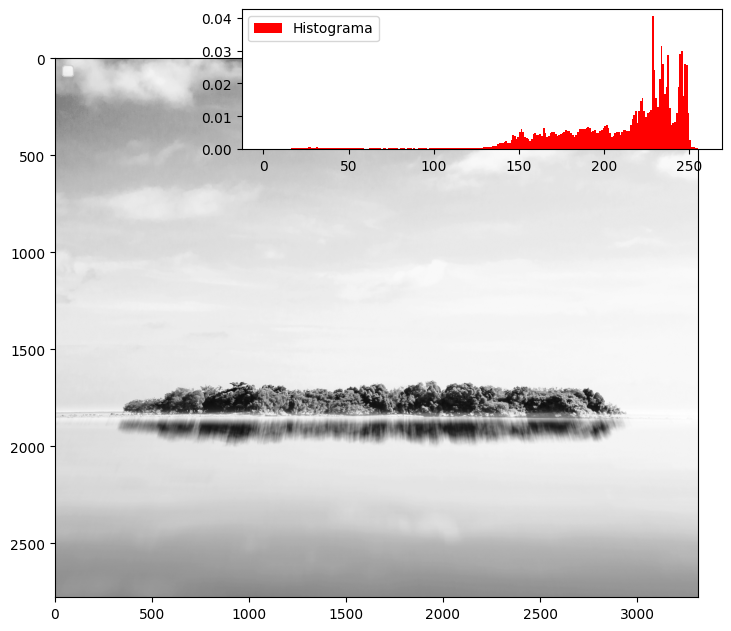

In [3]:
img = cv.imread('img_tarefa1.jpg') 

plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(img)


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(img.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show

<h3>Operações de transformação da imagem: Operações ponto à ponto</h3>

<p>
Primeiro, vamos usar o histograma pra deixar essa imagem mais escura e contrastada.

Um dos métodos de realizar o ajuste é fazendo uma função linear atuar sobre cada pixel, levando um ponto da imagem inicial até um ponto transformado na imagem processada:

\begin{equation}
g = \alpha f + \beta
\end{equation}

Usaremos valores arbitrários $\alpha$ e $\beta$ desde que respeitem nosso objetivo: <strong>aumentar o contraste e diminuir o brilho total</strong>
</p>



In [4]:
print(img.shape)

(2778, 3316, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

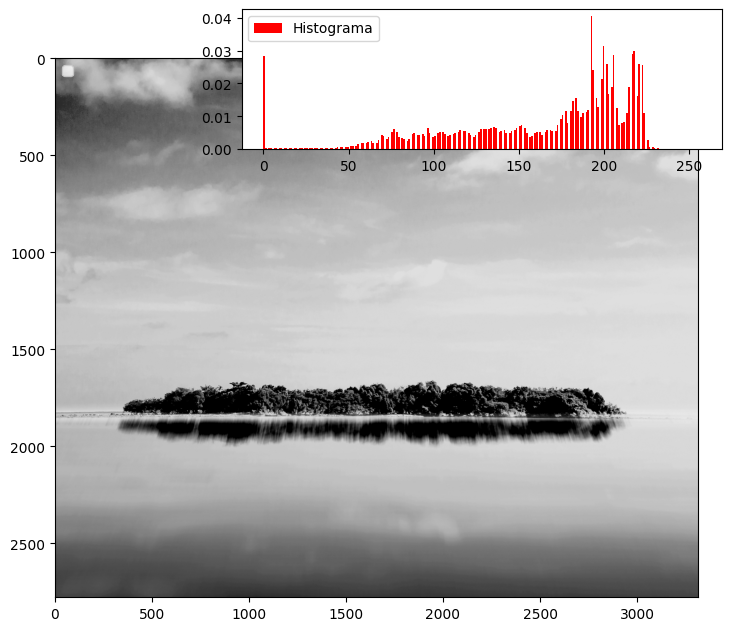

In [5]:
new_image = np.zeros(img.shape, img.dtype)
input_output = [[],[]]

alpha = 1.5 
beta = -150

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
            input_output[0].append(img[y,x,c])
            input_output[1].append(new_image[y,x,c])
            
            
plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(new_image)


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(new_image.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show

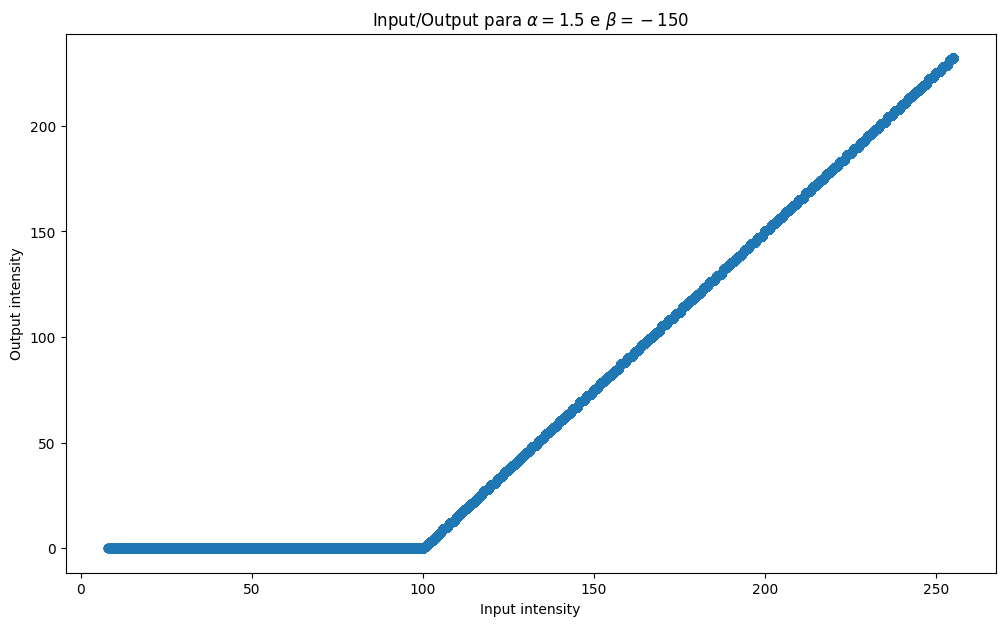

In [6]:
plt.scatter(input_output[0], input_output[1])

plt.title(r"Input/Output para $\alpha=1.5$ e $\beta=-150$")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

plt.show()


<p>
É possível perceber que alguns valores colapsaram na parte esquerda do histograma, isso acontece porque alguns pedaços da imagens <i><strong>já estavam perto do "preto absoluto", correspondendo a 0 na escala de cinzas, portanto, perdemos informação nesses pontos.</i></strong>

Já nos tons mais claros não perdemos informação, pois mantivemos o comportamento em intensidades mais altas. Conseguimos ver isso também no gráfico de input/output, tons com input perto de 255 tiveram output perto de 230 assim como aponta o histograma.

Uma coisa que já podemos concluir é que a fotografia original foi muito bem exposta, não perdeu informação nem pro escuro e nem pro claro mesmo tendo os dois extremos presentes na foto.

<i>Mas agora vamos deixar a foto mais escura e ao mesmo tempo reter a informação nos tons mais escuros</i>

Para isso, vamos usar um $\alpha<1$ para diminuir o contraste e $\beta<0$ para escurecermos a foto
</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

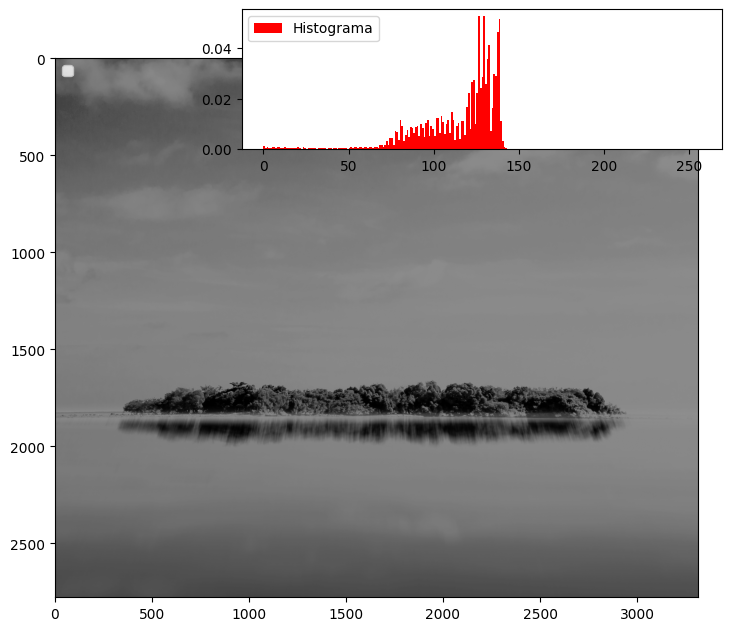

In [7]:
new_image = np.zeros(img.shape, img.dtype)
input_output = [[],[]]

alpha = 0.60 
beta = -10

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
            input_output[0].append(img[y,x,c])
            input_output[1].append(new_image[y,x,c])
            
plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(new_image)


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(new_image.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show

Uma observação que cada imagem processada, por ser grande, teve um tempo médio de 2min 30s de processamento, enquanto a plotagem dos scatterplots demoram aprox. 2min cada. Como precisamos definir os valores de $\alpha$ e $\beta$ testando, demanda um certo tempo para testar se os valores foram adequados. O que é inviável se pensarmos em projetos maiores e mais complexos.

Mas pudemos diminuir o contraste e o brilho a ponto que pudemos escurecer a imagem sem perder informações nos tons mais escuros

Vamos redistribuir o contraste na imagem usando a técnica de equalização de histograma:

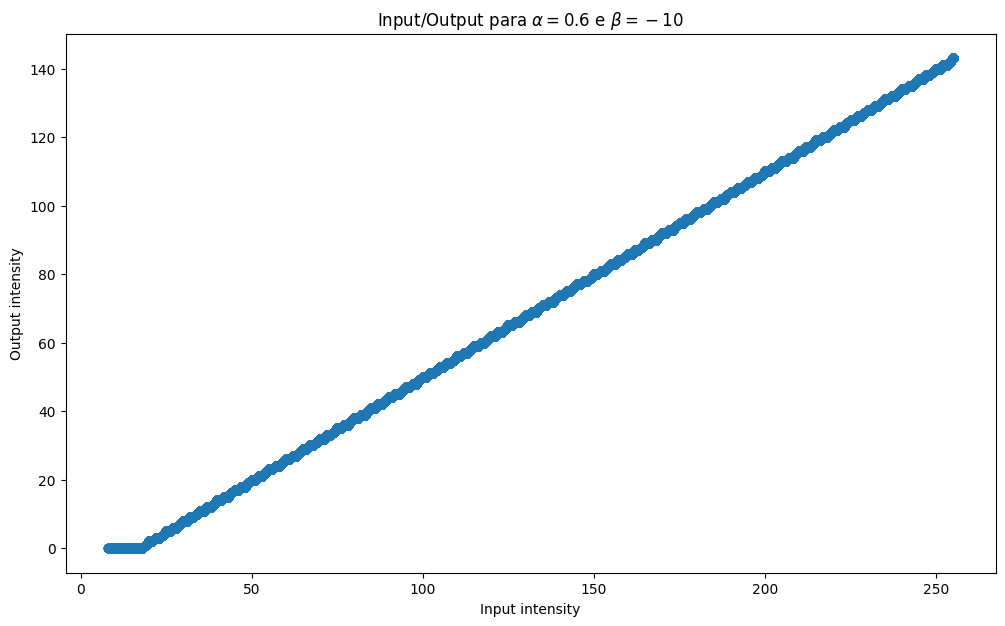

In [8]:
plt.scatter(input_output[0], input_output[1])

plt.title(r"Input/Output para $\alpha=0.6$ e $\beta=-10$")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


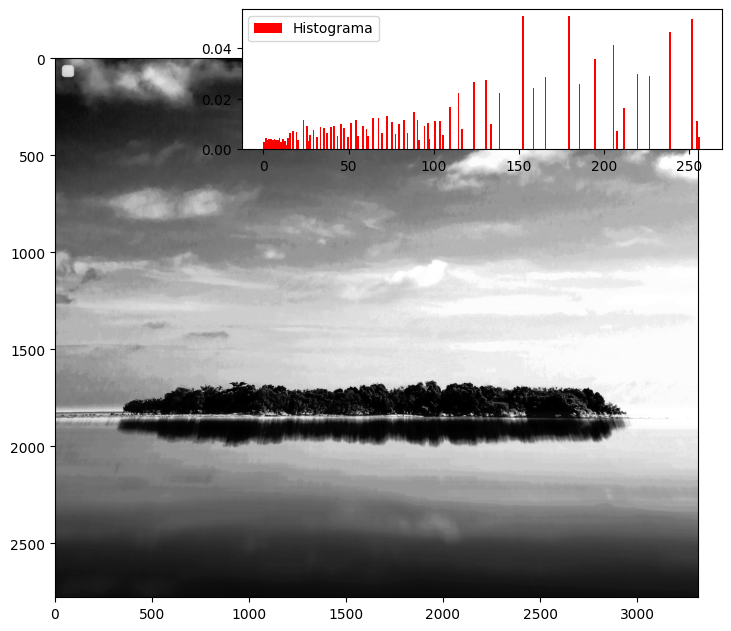

In [9]:
gray = cv.cvtColor(new_image, cv.COLOR_RGB2GRAY)
equ = cv.equalizeHist(gray) #Método do OpenCV para equalização de histogramas

plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(equ, cmap='gray')


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(equ.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

Podemos reintroduzir o contraste a imagem, mas não há um critério de controle, a exposição inicial do fotografo foi muito melhor distribuída pois valorizou os tons mais claros de cinza que mostram melhor a imagem.

Vamos agora trabalhar com uma segunda imagem:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


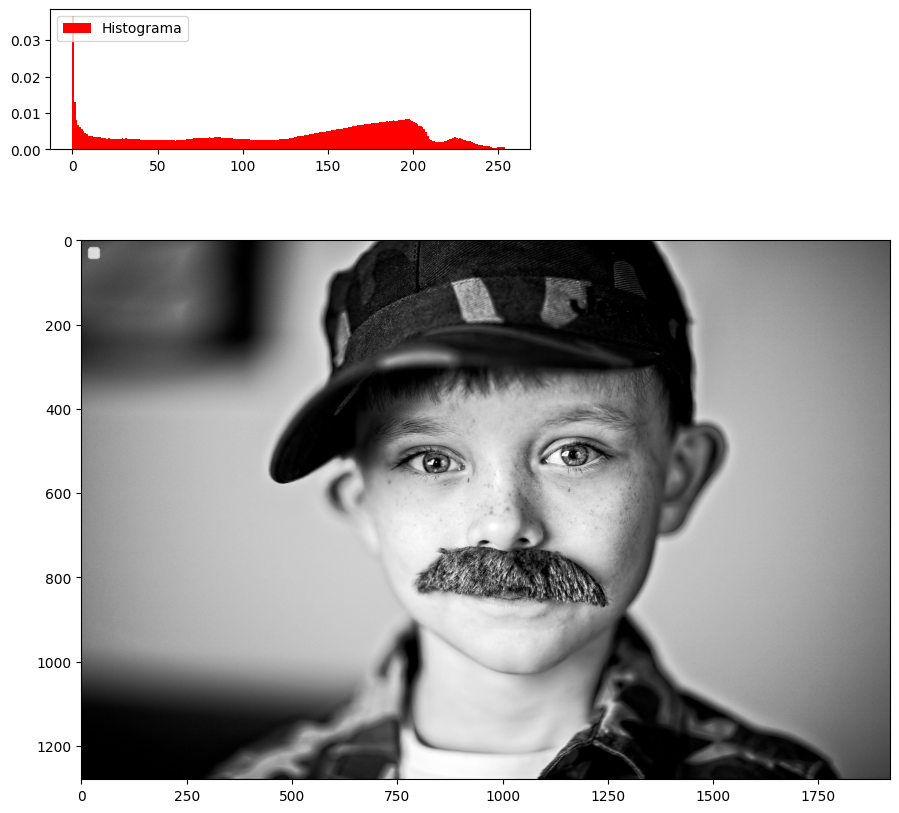

In [57]:
img2 = cv.imread('img_tarefa2.jpg',0) 

plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(img2, cmap="gray")


l, b, h, w = 0.15, 1.01, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(img2.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

In [58]:
largura = 640  
altura = 480  
resized_image = cv.resize(img2, (largura, altura)) #redimensionando para simplificar o processo

_, global_thresholded = cv.threshold(resized_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

<h2>Global e Otsu Thresholding:</h2>

Essa técnica aplica um Thresholding global, baseando-se no histograma geral da imagem... Imagens com o objeto muito bem definido na escala de cinzas são muito beneficiadas nesse método, pois ele leva em conta toda a imagem.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


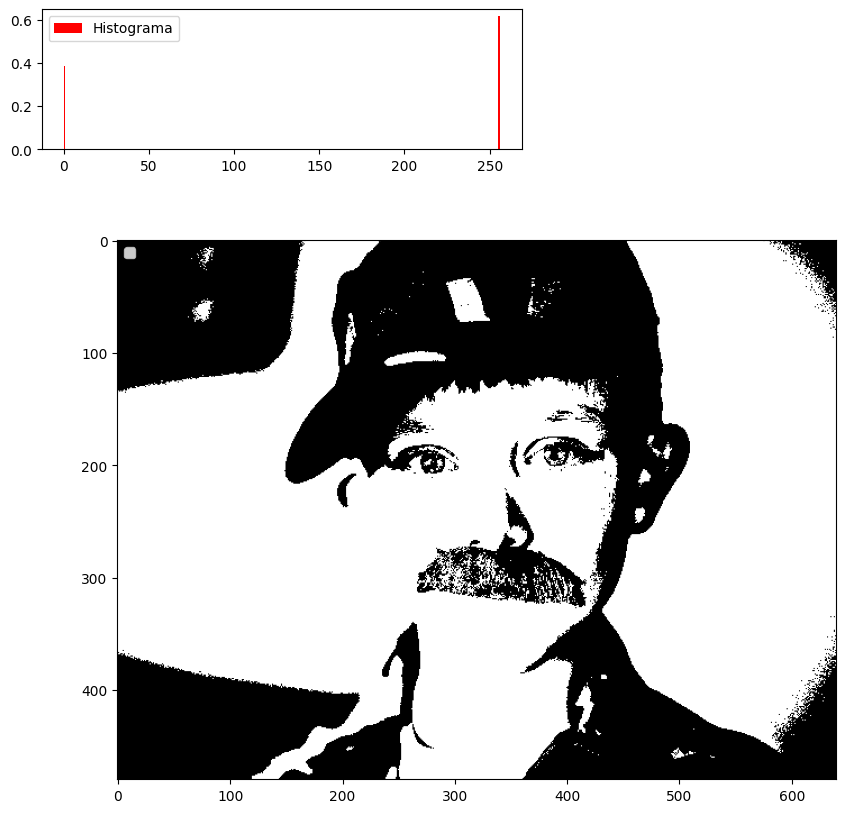

In [59]:
fig, ax1 = plt.subplots()
ax1.imshow(global_thresholded, cmap="gray")


l, b, h, w = 0.15, 1.01, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(global_thresholded.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

<h2>Adaptative Thresholding:</h2>

Esse tipo de Thresholding leva em conta a vizinhança dos pixeis, não a imagem inteira, para definir a operação daquele pixel em específico. Uma operação com seus vizinhos (média ou gaussiana) que define se aquele pixel assume o valor de 0 ou 1

Assim, vamos ter um modelo que é melhor adaptável para diferentes condições de luz dentro de uma imagem:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


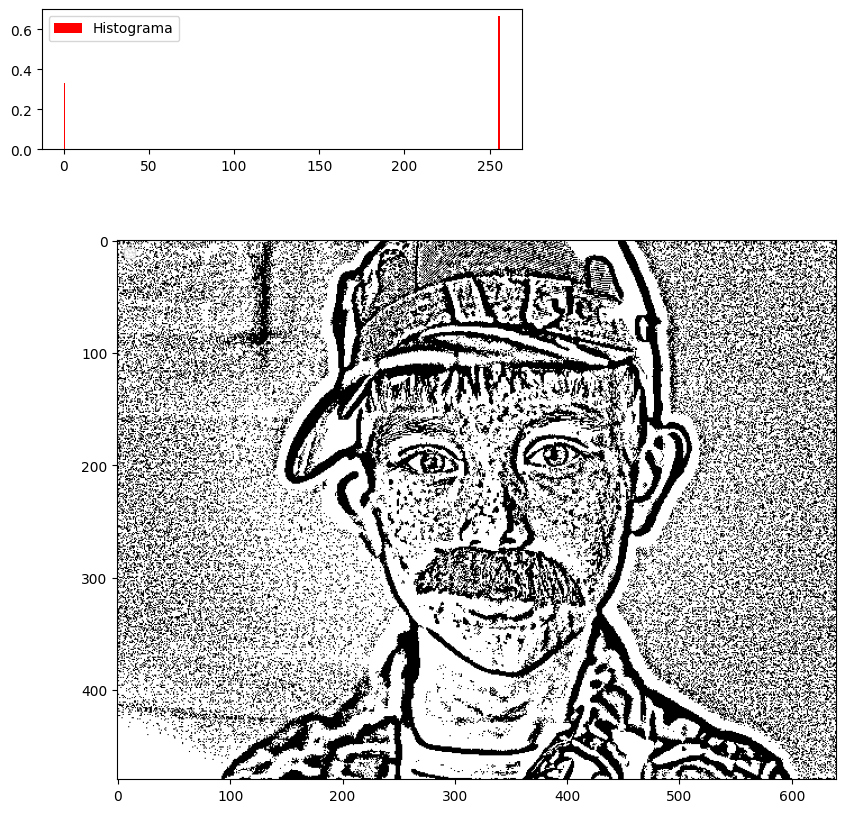

In [60]:
#Thresholding usando média dos pixeis vizinhos

daptative_mean_tresholding = cv.adaptiveThreshold(resized_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

fig, ax1 = plt.subplots()
ax1.imshow(adaptative_mean_tresholding, cmap="gray")


l, b, h, w = 0.15, 1.01, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(adaptative_mean_tresholding.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


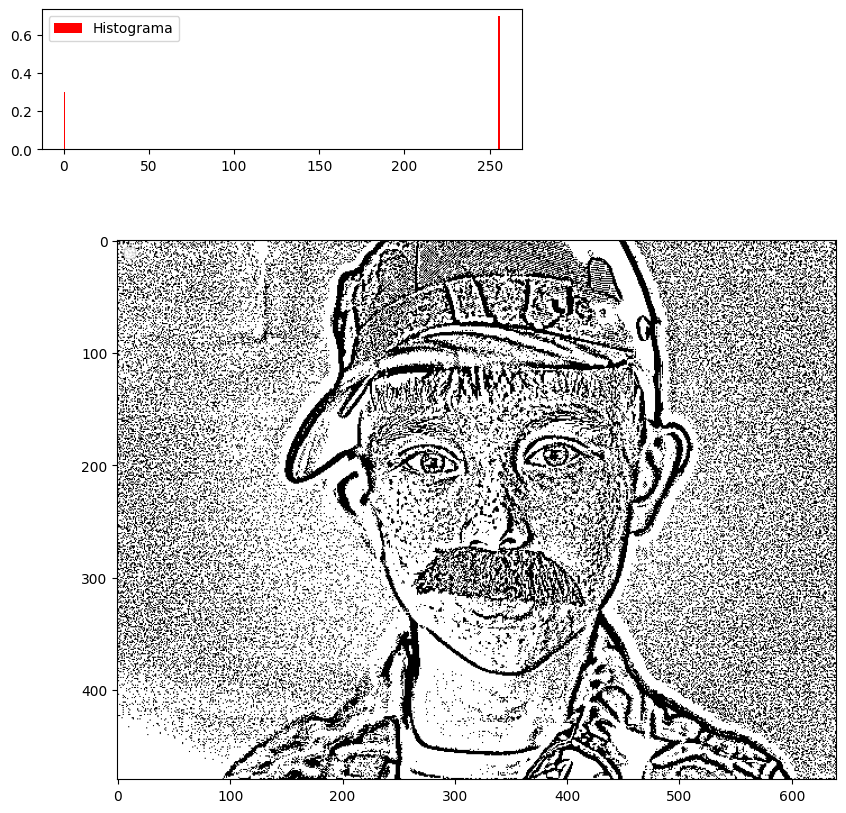

In [61]:
#Thresholding usando distribuição gaussiana dos pixeis vizinhos

adaptative_gaussian_tresholding = cv.adaptiveThreshold(resized_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

fig, ax1 = plt.subplots()
ax1.imshow(adaptative_gaussian_tresholding, cmap="gray")


l, b, h, w = 0.15, 1.01, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(adaptative_gaussian_tresholding.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')